<a href="https://colab.research.google.com/github/Qualot/deep-learning-from-scratch/blob/colab/ch04/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
np.set_printoptions(linewidth=10000)

In [3]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#Sum of squared error: 2乗和誤差
$$
  E = \sum_{k} \left(y_k - t_k \right)^2
$$

In [4]:
def sum_squared_error(y, t):
  return 0.5 * np.sum((np.array(y) - np.array(t))**2)

## When the softmax returns "2"


In [5]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_squared_error(y, t))

0.09750000000000003


## When the softmax returns "7"


In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(sum_squared_error(y, t))

0.5975


#Cross entrypy error: 交差エントロピー誤差
$$
  E = -\sum_{k} t_k \mathrm{log} \left(y_k \right)
$$

In [7]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  delta = 1e-7
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338


In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


In [10]:
t = np.array([2, 1, 0, 3])
# Calculate the number of classes
num_classes = np.max(t) + 1

# Create a one-hot label array using numpy's eye function
t_goal = np.eye(num_classes)[t]

print(t_goal)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


# MNIST のロード

In [11]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train[0])

11490434/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0  

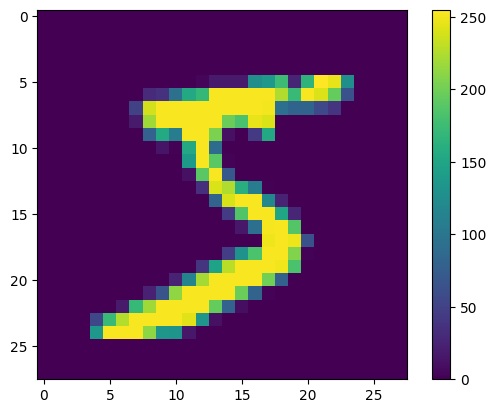

In [12]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
def get_data():
  #when using dataset library
  #  (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, flatten=True, one_hot_label=False)
  (x_train, t_train), (x_test, t_test) = mnist.load_data()

  #normalize
  x_train, x_test = x_train / 255.0, x_test / 255.0

  #flatten
  x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]

  #one-hot
  t_train = to_categorical(t_train)
  t_test = to_categorical(t_test)

  print(f"x_train.shape is ... {x_train.shape}")
  print(f"t_train.shape is ... {t_train.shape}")
  print(f"x_test.shape is ... {x_test.shape}")
  print(f"t_test.shape is ... {t_test.shape}")

  train_size = x_train.shape[0]
  batch_size = 10
  batch_mask = np.random.choice(train_size, batch_size)
  print(f"batch_mask is ... {batch_mask}")
  print()

  print(f"x_batch is ... \n{x_train[batch_mask].shape}")
  print()
  print(f"t_batch is ... \n{t_train[batch_mask]}")
  print()
  print()

  return x_test, t_test

In [14]:
x, t = get_data()
print(t[0])

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 10)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 10)
batch_mask is ... [21213 46833 56546 44378 42793 27787 40840  9591 46442 53167]

x_batch is ... 
(10, 784)

t_batch is ... 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
alist = np.array(range(10))
blist = np.array(range(5))
print(alist)
print(blist)
print(alist[blist*2])
print(alist.shape)
print(alist.reshape(1, alist.size).shape)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[0 2 4 6 8]
(10,)
(1, 10)


# Numerical differentials

In [16]:
def numerical_diff(f, x):
  h = 1e-4 #0.0001
  return (f(x+h) - f(x-h)) / (2.0 * h)

In [17]:
def function_1(x):
  return 0.01*x**2 + 0.1 * x

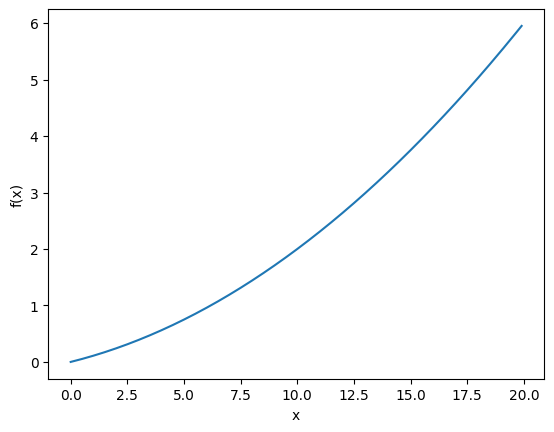

In [18]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


0.1999999999990898
0.2999999999986347


In [20]:
def function_2(x):
  return np.sum(x**2)

In [24]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)
  print(f"x.size is ... {x.size}")
  for idx in range(np.max(x.shape)):
    tmp_val = x[idx]
    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [25]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


x.size is ... 2
[6. 8.]
x.size is ... 2
[0. 4.]
x.size is ... 2
[6. 0.]


X [size=81] is ... 
[[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
 [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]]

Y [size=81] is ... 
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
 [ 2.   2.   2.   2.   2.   2.   2.   2.   2. ]]

After flattening...
X [size=81] is ... 
[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.  -2.  -

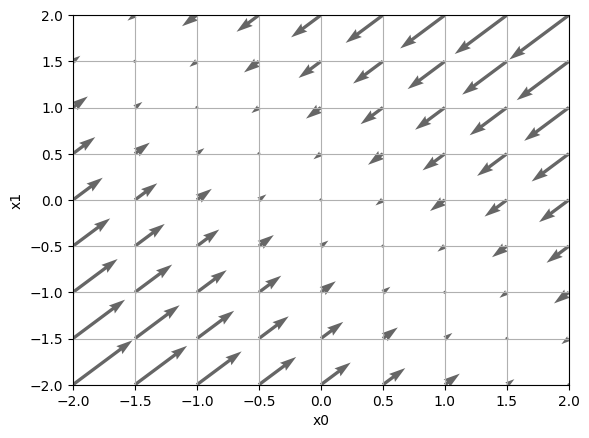

In [29]:
#x0 = np.arange(-2, 2.5, 0.25)
#x1 = np.arange(-2, 2.5, 0.25)
x0 = np.arange(-2, 2.5, 0.5)
x1 = np.arange(-2, 2.5, 0.5)
X, Y = np.meshgrid(x0, x1)

print(f"X [size={X.size}] is ... \n{X}")
print()
print(f"Y [size={Y.size}] is ... \n{Y}")
print()

X = X.flatten()
Y = Y.flatten()

print("After flattening...")
print(f"X [size={X.size}] is ... \n{X}")
print()
print(f"Y [size={Y.size}] is ... \n{Y}")
print()
print(f"np.array([X, Y]) [size={np.array([X, Y]).size}] is ... \n{np.array([X, Y])}")
print()
print(f"np.array([X, Y]).T [size={np.array([X, Y]).T.size}] is ... \n{np.array([X, Y]).T}")
print()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

In [30]:
y_single = np.array([0.6, 0.2, 0.2])

y_single.reshape(1, y_single.size)
print(y_single)
print(y_single.shape)

print(y_single.reshape(1, y_single.size))
print(y_single.reshape(1, y_single.size).shape)


[0.6 0.2 0.2]
(3,)
[[0.6 0.2 0.2]]
(1, 3)


In [ ]:
alist = np.array([[1, 2, 3], [4, 5, 6]])
print(np.max(alist.shape))

In [27]:
alist = np.arange(-2, 2.5, 0.25)
print(list(alist))

[-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
